**Percentiles** For example, let's consider the sizes of the five largest continents – Africa, Antarctica, Asia, North America, and South America – rounded to the nearest million square miles.

In [2]:
import numpy as np

In [3]:
sizes = np.array([12, 17, 6, 9, 7])
sizes

array([12, 17,  6,  9,  7])

The `80th` percentile is the smallest value that is at least as large as `80%` of the elements of sizes

**Step 1**: sort the list in ascending order <br/>
**Step 2**: grasp `80%` of the elements from left to right

In [4]:
sorted_sizes = np.sort(sizes)
sorted_sizes

array([ 6,  7,  9, 12, 17])

In [11]:
number_of_elements = 0.8*(len(sizes)-1)
number_of_elements

3.2

`80th` percentile is at index `3th` (round down) or the number `12`

In [14]:
sorted_sizes[3]

12

`80th` percentile is at index `4th` (round up) or the number `17`

In [16]:
sorted_sizes[4]

17

**Handling with floating rank**

In [12]:
number_of_elements = 0.7*(len(sizes)-1)
number_of_elements

2.8

round it up, becomes index `3th`; then `70th` percentile is at number `12`

In [13]:
sorted_sizes[3]

12

**Interpoate ("linear" approach) with floating rank**

**Step 1**: Determine the elements at the calculated rank using fomular `r=p(n-1)`; `70th` is at r=0.7*(5-1)=2.8; Example, rank `2.8` means that positions of elements `2th` and `3th` which are `9` and `12`, respectively

**Step 2**: Take the difference between these two elements and multiply it by the fractional portion of the rank. For our example, this is: `(12 – 9)0.8 = 2.4`. <br/>
**Step 3**: Take the lower-ranked value in **Step 1** and add the value from **Step 2** to obtain the interpolated value for the percentile. For our example, that value is `9 + 2.4 = 11.4`.

**Usig numpy and pandas**

In [9]:
np.percentile(sizes, 80, interpolation='linear')

13.0

In [10]:
np.percentile(sizes, 70, interpolation='linear')

11.399999999999999

In [18]:
import pandas as pd

my_data = {
    "Size": sizes
}

df = pd.DataFrame(my_data) 
df

,Size
0,12
1,17
2,6
3,9
4,7


In [19]:
df["Size"].quantile(0.8, interpolation='linear')

13.0

In [20]:
df["Size"].quantile(0.7, interpolation='linear')

11.399999999999999

**Other example**

In [10]:
import pandas as pd
scores_and_sections = pd.read_csv('scores_by_section.csv')
scores_and_sections

,Section,Midterm
0,1,22
1,2,12
2,2,23
3,2,14
4,1,20
...,...,...
354,5,24
355,2,16
356,2,17
357,12,16


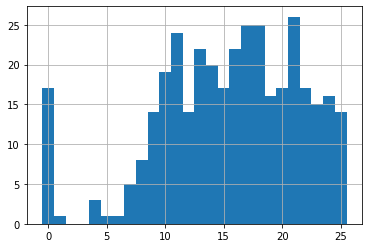

In [43]:
scores_and_sections['Midterm'].hist(bins=np.arange(-0.5, 25.6, 1))

In [45]:
scores_and_sections['Midterm'].quantile(0.85)

22.0

**Quantiles**

In [46]:
scores_and_sections['Midterm'].quantile(0.25)

11.0

In [47]:
scores_and_sections['Midterm'].quantile(0.50)

16.0

In [48]:
scores_and_sections['Midterm'].quantile(0.75)

20.0

In [49]:
scores_and_sections['Midterm'].quantile(1)

25.0

In [50]:
scores_and_sections['Midterm'].max()

25

**Bootstrap** We study the `Total Compensation` column

In [53]:
df = pd.read_csv("san_francisco_2015.csv")
df

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",...,21538,82146.04,0.00,0.00,82146.04,16942.21,12340.88,6337.73,35620.82,117766.86
1,Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12.0,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,...,5459,32165.75,973.19,848.96,33987.90,0.00,4587.51,2634.42,7221.93,41209.83
2,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,41541,71311.00,5757.98,0.00,77068.98,14697.59,12424.50,6370.06,33492.15,110561.13
3,Calendar,2015,4,Community Health,DPH,Public Health,351.0,Municipal Executive Association - Miscellaneous,0900,Management,...,26718,28430.25,0.00,763.07,29193.32,0.00,4223.14,5208.51,9431.65,38624.97
4,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790.0,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,...,45810,7948.75,0.00,0.00,7948.75,0.00,2873.17,616.24,3489.41,11438.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42984,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200.0,"Transportation Workers, Local 200",9100,Street Transit,...,13250,80691.52,11865.91,3290.29,95847.72,16909.07,12244.02,7788.00,36941.09,132788.81
42985,Calendar,2015,4,Community Health,DPH,Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,...,14845,7559.66,0.00,0.00,7559.66,153.74,0.00,2132.23,2285.97,9845.63
42986,Calendar,2015,1,Public Protection,POL,Police,911.0,Police Officers' Association,Q000,Police Services,...,40128,48843.58,2965.85,3316.21,55125.64,11047.55,6212.24,910.16,18169.95,73295.59
42987,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,39.0,"Stationary Engineers, Local 39",7300,Journeyman Trade,...,48315,16319.20,0.00,0.00,16319.20,0.00,2389.32,1264.85,3654.17,19973.37


we will focus our attention on those who had at least the equivalent of a half-time job for the whole year. At a minimum wage of about `$10` per hour, and `20` hours per week for `52` weeks, that's a salary of about `$10,000`.

In [54]:
df = df.loc[df["Salaries"] > 10000]
df

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",...,21538,82146.04,0.00,0.00,82146.04,16942.21,12340.88,6337.73,35620.82,117766.86
1,Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12.0,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,...,5459,32165.75,973.19,848.96,33987.90,0.00,4587.51,2634.42,7221.93,41209.83
2,Calendar,2015,4,Community Health,DPH,Public Health,790.0,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",...,41541,71311.00,5757.98,0.00,77068.98,14697.59,12424.50,6370.06,33492.15,110561.13
3,Calendar,2015,4,Community Health,DPH,Public Health,351.0,Municipal Executive Association - Miscellaneous,0900,Management,...,26718,28430.25,0.00,763.07,29193.32,0.00,4223.14,5208.51,9431.65,38624.97
6,Calendar,2015,4,Community Health,DPH,Public Health,791.0,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,...,7506,187247.00,0.00,11704.06,198951.06,37683.66,12424.50,11221.73,61329.89,260280.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42983,Calendar,2015,1,Public Protection,JUV,Juvenile Probation,790.0,"SEIU - Miscellaneous, Local 1021",9700,Community Development,...,49719,42793.30,0.00,0.00,42793.30,8506.93,6731.93,3317.55,18556.41,61349.71
42984,Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,200.0,"Transportation Workers, Local 200",9100,Street Transit,...,13250,80691.52,11865.91,3290.29,95847.72,16909.07,12244.02,7788.00,36941.09,132788.81
42986,Calendar,2015,1,Public Protection,POL,Police,911.0,Police Officers' Association,Q000,Police Services,...,40128,48843.58,2965.85,3316.21,55125.64,11047.55,6212.24,910.16,18169.95,73295.59
42987,Calendar,2015,6,General Administration & Finance,ADM,General Services Agency - City Admin,39.0,"Stationary Engineers, Local 39",7300,Journeyman Trade,...,48315,16319.20,0.00,0.00,16319.20,0.00,2389.32,1264.85,3654.17,19973.37


Visualize the histogram

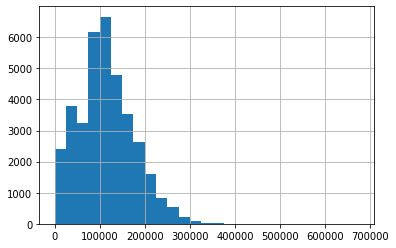

In [55]:
my_bins = np.arange(0, 700000, 25000)
df['Total Compensation'].hist(bins=my_bins)

**Compute the median**

In [73]:
pop_median = df['Total Compensation'].median()
pop_median

110305.79

In [57]:
df['Total Compensation'].quantile(0.50)

110305.79

**Now we estimate this value using bootstrap (resampling)**

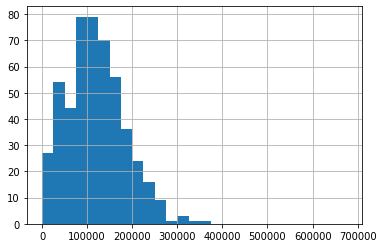

In [60]:
my_bins = np.arange(0, 700000, 25000)

our_sample = df.sample(500, replace=False)
our_sample['Total Compensation'].hist(bins=my_bins)

In [61]:
est_median = our_sample['Total Compensation'].median()
est_median

113594.98000000001

In [62]:
our_sample['Total Compensation'].quantile(0.50)

113594.98000000001

The sample size is large. By the law of averages, the distribution of the sample resembles that of the population, and consequently the sample median is not very far from the population median (though of course it is not exactly the same).

So now we have one estimate of the parameter. But had the sample come out differently, the estimate would have had a different value. We would like to be able to quantify the amount by which the estimate could vary across samples. That measure of variability will help us measure how accurately we can estimate the parameter.

## Bootstrap method

* Treat the original sample as if it were the population.
* Draw from the sample, at random with replacement, the same number of times as the original sample size.

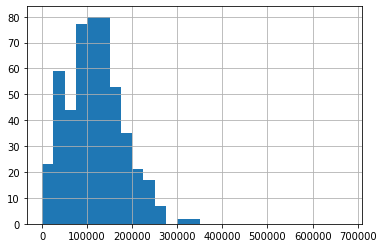

In [64]:
resample_1 = our_sample.sample(frac=1.0, replace=True)
resample_1['Total Compensation'].hist(bins=my_bins)

Compute the median of the new sample

In [65]:
resample_1['Total Compensation'].median()

115128.59

In [67]:
resample_2 = our_sample.sample(frac=1.0, replace=True)
resampled_median_2 = resample_2['Total Compensation'].median()
resampled_median_2

109993.67499999999

Resamnpling for `5,000` times

In [76]:
bstrap_medians = []
for i in range(1, 5000+1):
    one_resample = our_sample.sample(frac=1.0, replace=True)
    one_median = one_resample['Total Compensation'].median()
    bstrap_medians.append(one_median)

In [77]:
my_median_data = {
    "Median": bstrap_medians 
}

median_df = pd.DataFrame(my_median_data)
median_df

,Median
0,112211.895
1,113594.980
2,111898.065
3,110711.700
4,112205.780
...,...
4995,118572.770
4996,112175.070
4997,120856.830
4998,104760.670


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013C1B0CA508>]],
      dtype=object)

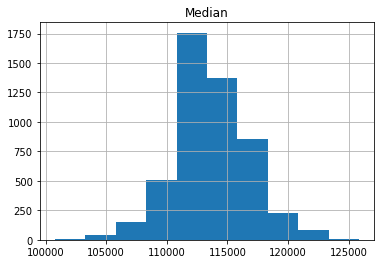

In [78]:
median_df.hist()

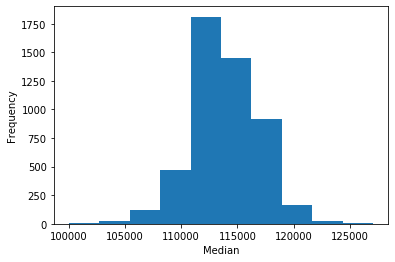

In [79]:
import matplotlib.pyplot as plt

plt.hist(bstrap_medians)
plt.xlabel("Median")
plt.ylabel("Frequency")
plt.show()

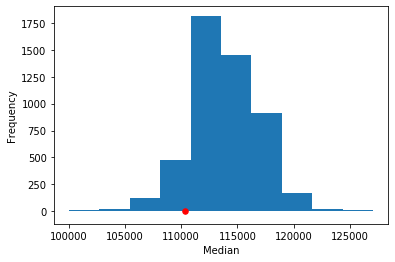

In [80]:
plt.hist(bstrap_medians, zorder=1)
plt.xlabel("Median")
plt.ylabel("Frequency")

plt.scatter(pop_median, 0, color='red', s=30, zorder=2);
plt.show()

Let's find out the middle `95%` of the resampled medians contains the red dot

In [82]:
left = median_df.quantile(0.025)
left

Median    106795.07
Name: 0.025, dtype: float64

In [83]:
right = median_df.quantile(0.975)
right

Median    120190.76
Name: 0.975, dtype: float64

**The population median of `$110,305` is between these two numbers. The interval and the population median are shown on the histogram below.**

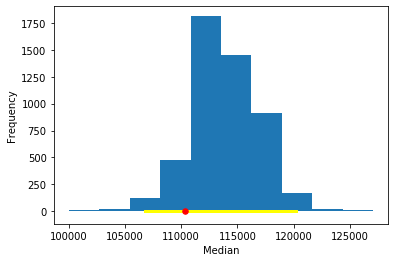

In [90]:
plt.hist(median_values, zorder=1)
plt.xlabel("Median")
plt.ylabel("Frequency")


plt.plot([left, right], [0, 0], color='yellow', lw=3, zorder=2)
plt.scatter(pop_median, 0, color='red', s=30, zorder=3);

plt.show()

So, the "middle 95%" interval of estimates captured the parameter in our example

**Let repeat the processs 100 times to see how frequently the interval contains the parameter**. We will store all left and right ends per simulation.

In [92]:
def bootstrap_sample(our_sample):
    bstrap_medians = []
    for i in range(1, 5000+1):
        one_resample = our_sample.sample(frac=1.0, replace=True)
        one_median = one_resample['Total Compensation'].median()
        bstrap_medians.append(one_median)
    
    return bstrap_medians
        

In [98]:
left_ends = []
right_ends = []

for i in range(1, 100+1):
    our_sample = df.sample(500, replace=False)
    bstrap_medians = bootstrap_sample(our_sample)
    
    my_median_data = {
        "Median": bstrap_medians 
    }

    median_df = pd.DataFrame(my_median_data)
    left = median_df['Median'].quantile(0.025)
    right = median_df['Median'].quantile(0.975)

    left_ends.append(left)
    right_ends.append(right)

In [99]:
my_left_right = {
    "Left": left_ends,
    "Right": right_ends
}

left_right_df = pd.DataFrame(my_left_right)
left_right_df

,Left,Right
0,105241.9100,120742.470
1,105384.2455,114958.910
2,107854.0550,118737.000
3,105525.5600,117740.750
4,105878.7650,118388.840
...,...,...
95,101220.2050,111617.320
96,107480.5750,117929.325
97,104439.0150,113724.600
98,106148.5700,118088.550


In [100]:
good_experiments = left_right_df[(left_right_df["Left"] < pop_median) & (left_right_df["Right"] > pop_median)]
good_experiments

,Left,Right
0,105241.9100,120742.470
1,105384.2455,114958.910
2,107854.0550,118737.000
3,105525.5600,117740.750
4,105878.7650,118388.840
...,...,...
95,101220.2050,111617.320
96,107480.5750,117929.325
97,104439.0150,113724.600
98,106148.5700,118088.550


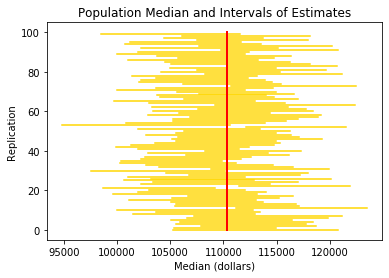

In [104]:

for i in np.arange(100):
    left = left_right_df.at[i, "Left"]
    right = left_right_df.at[i, "Right"]

    plt.plot([left, right], [i, i], color='gold')

plt.plot([pop_median, pop_median], [0, 100], color='red', lw=2)
plt.xlabel('Median (dollars)')
plt.ylabel('Replication')
plt.title('Population Median and Intervals of Estimates')
plt.show()


In other words, this process of estimation captures the parameter about `92%` of the time.